In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# EDA Soil-Survey Analysis Part 2 
soil_survey = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/Cocoa Production/Farmers Survey/soil_survey.csv')

In [13]:
soil_survey.head(5)

,ObsFarm#,FID0,Xf,Yf,Ecology,Xd,Yd,DistName,DistID,Region,REGION,DistKey,District,pH,SOC,Fe_meq100g,Al_meq100g,Clay
0,1,1202,-2.309,6.972,MSNW,-2.411475,6.864890,Dadiesoba,BA2,Brong Ahafo,BA,DADIESOABA,Dadiesoaba,6.61,0.617,0.023,1.69,34.76
1,2,1584,-2.230,6.319,ME,-2.248520,6.315544,Bibiani,WN6,Western North,WN,BIBIANI,Bibiani,5.54,0.173,0.023,3.01,12.76
2,3,1338,-0.222,6.201,DSIZ,-0.116434,6.222063,Oyoko,ER9,Eastern,ER,OYOKO,Oyoko,6.19,0.112,0.024,9.80,24.76
3,4,1410,-0.711,5.717,MSSE,-0.742504,5.820004,Asamankese,ER1,Eastern,ER,ASAMANKESE,Asamankese,5.14,0.097,0.027,12.30,18.76
4,5,1346,-0.537,6.088,MSSE,-0.435992,6.297231,Tafo,ER8,Eastern,ER,TAFO,Kibi/Tafo,6.99,0.318,0.030,13.23,18.76


In [14]:
# Check for missing values
soil_survey.isnull().sum()

ObsFarm#      0
FID0          0
Xf            0
Yf            0
Ecology       0
Xd            0
Yd            0
DistName      0
DistID        0
Region        0
REGION        0
DistKey       0
District      0
pH            0
SOC           0
Fe_meq100g    0
Al_meq100g    0
Clay          0
dtype: int64

In [15]:
# Check for duplicates
soil_survey.duplicated().sum()

0

In [16]:
soil_survey.dtypes

ObsFarm#        int64
FID0            int64
Xf            float64
Yf            float64
Ecology        object
Xd            float64
Yd            float64
DistName       object
DistID         object
Region         object
REGION         object
DistKey        object
District       object
pH            float64
SOC           float64
Fe_meq100g    float64
Al_meq100g    float64
Clay          float64
dtype: object

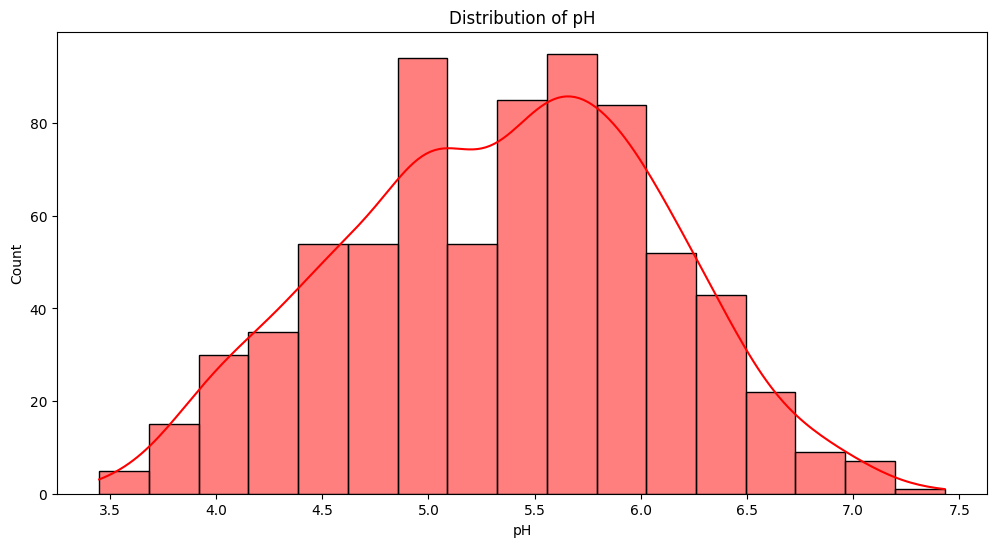

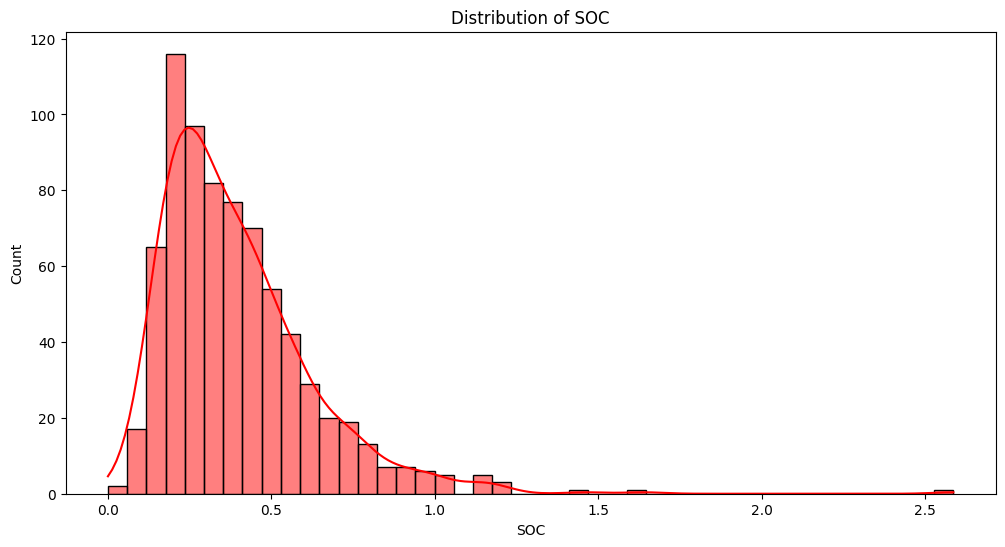

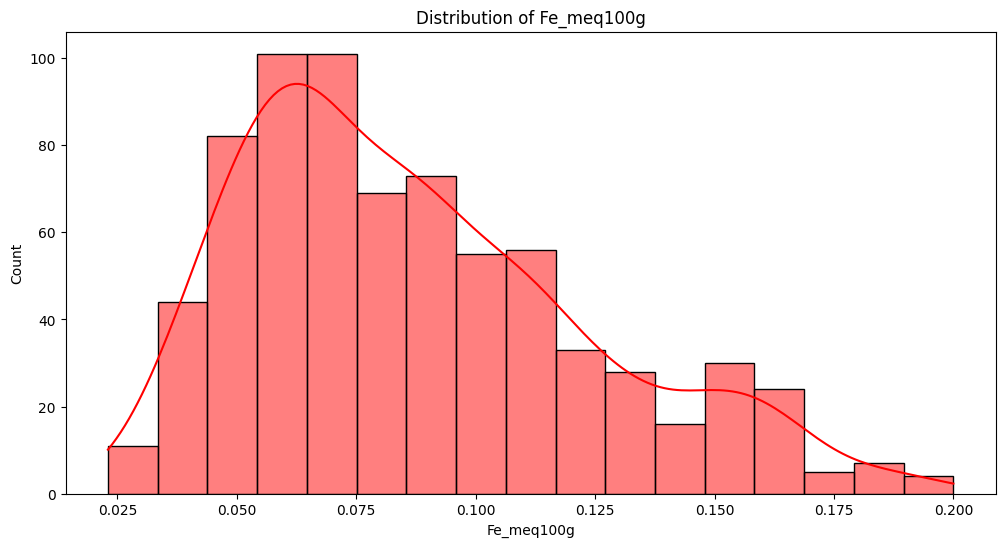

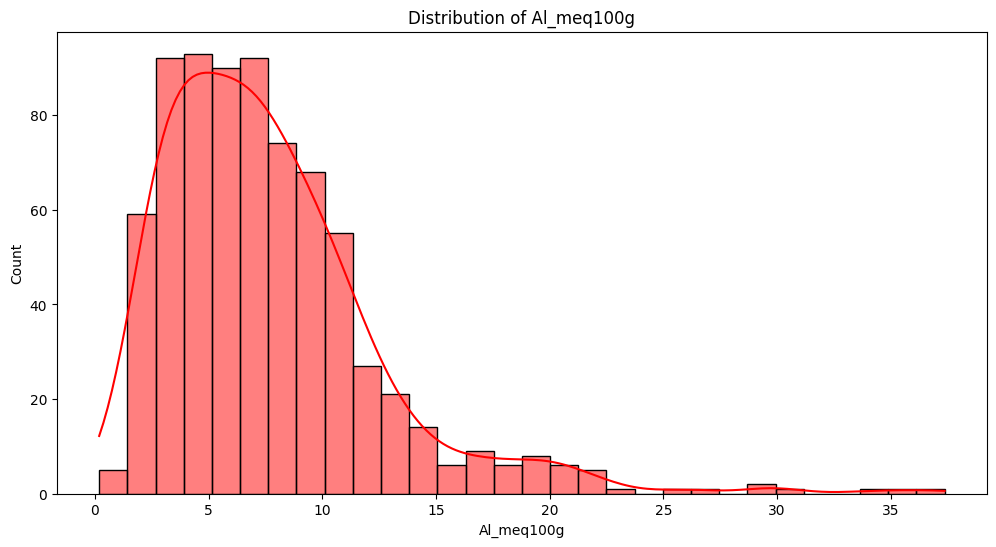

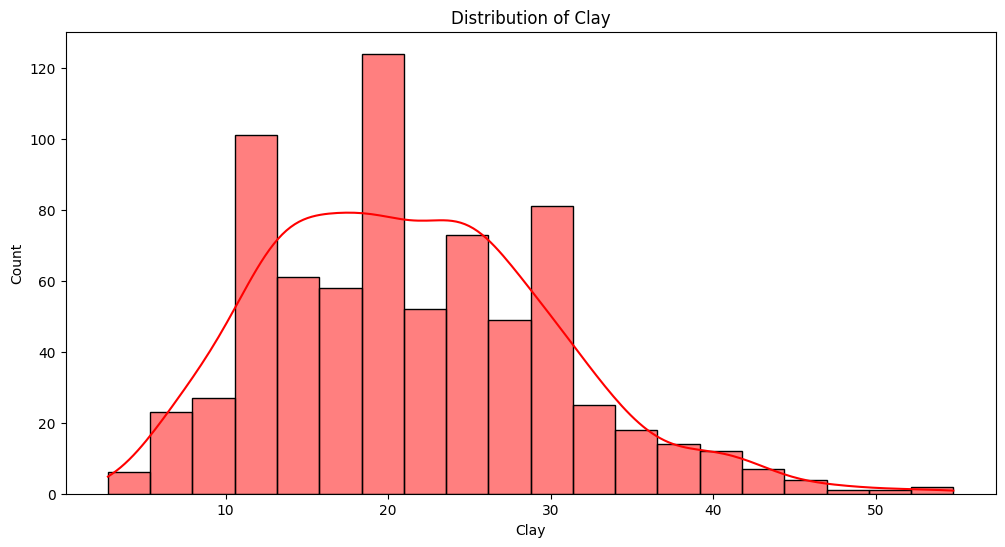

In [89]:
# What is the distribution of soil properties across the cocoa farms in Ghana?
# pH and clay: The distribution of pH and clay values follows a normal distribution. 
# SOC, Iron, and Aluminium: The distribution of soil organic carbon (SOC), iron, and aluminium concentrations in the  is positively right-skewed. 
# Need to check for skewness in the final merged_data

numerical_columns = soil_survey[['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']]

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(x=col, data=numerical_columns, color='red',kde=True)
    plt.xlabel(col)  # Add x-label based on the column name
    plt.title(f'Distribution of {col}')
    plt.show()



<Axes: xlabel='count', ylabel='Region'>

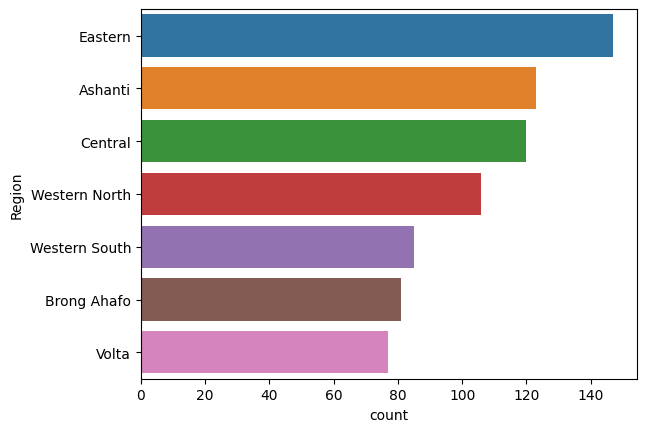

In [17]:
# What are the major cocoa growing regions in Ghana?
region_counts = soil_survey['Region'].value_counts().sort_values(ascending=False)

# Plot the sorted count of cocoa growing regions
sns.countplot(y=soil_survey['Region'], order=region_counts.index)

<Axes: xlabel='count', ylabel='Region'>

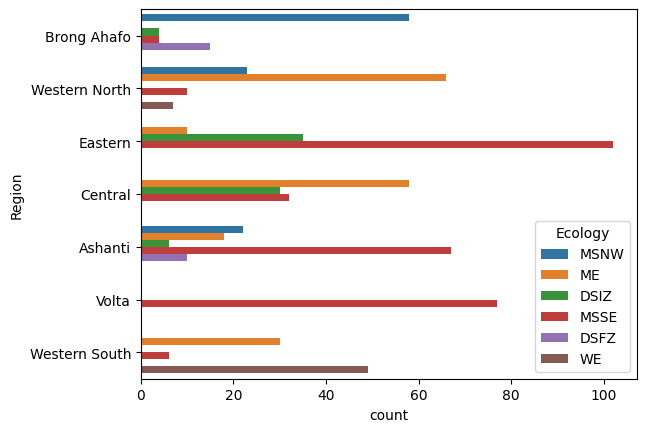

In [18]:
#Do certain ecological zones dominate specific regions?
sns.countplot(y=soil_survey['Region'],hue=soil_survey['Ecology'])

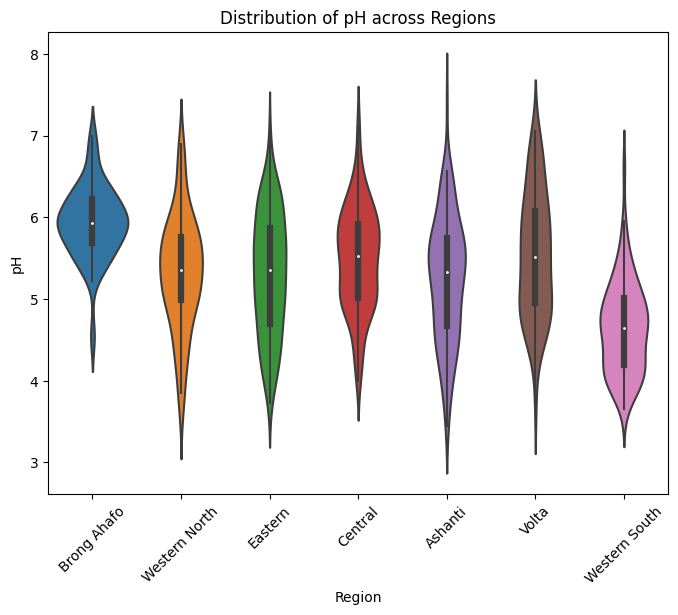

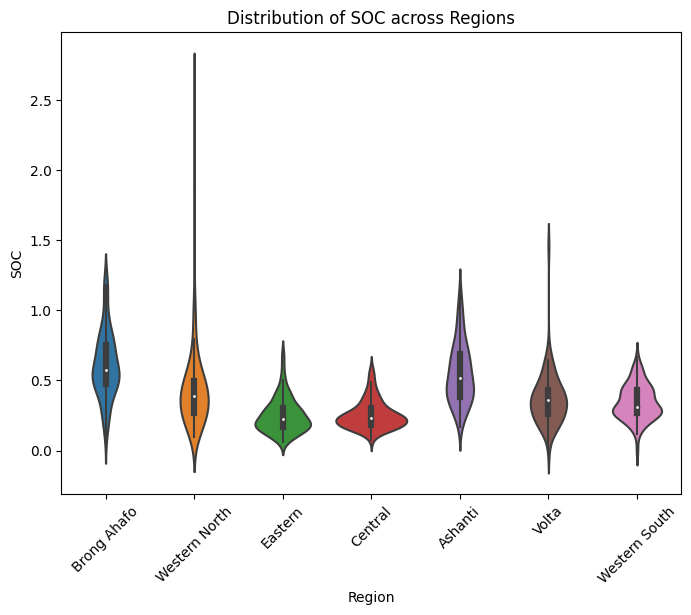

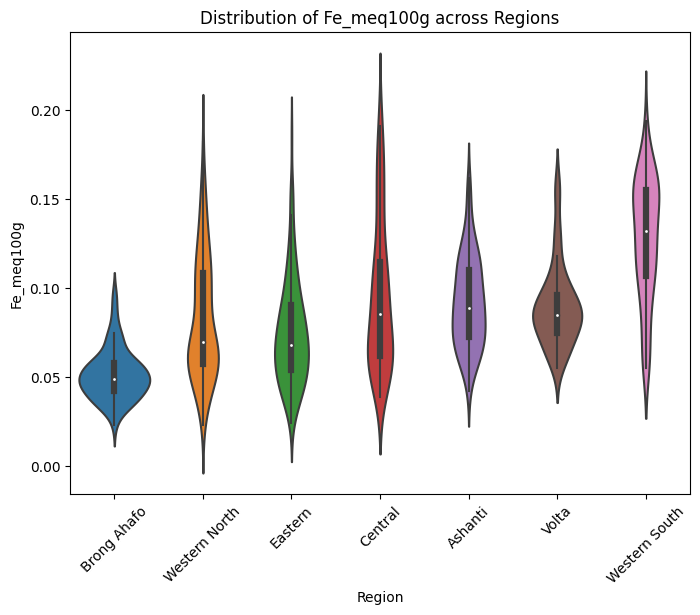

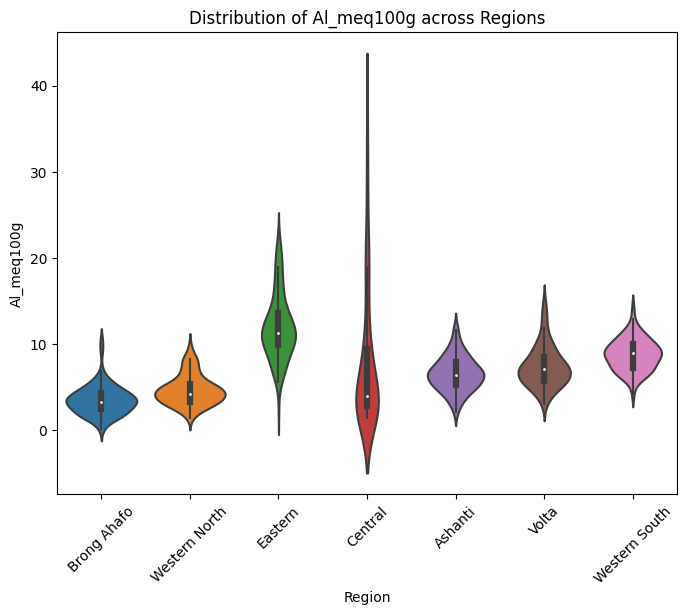

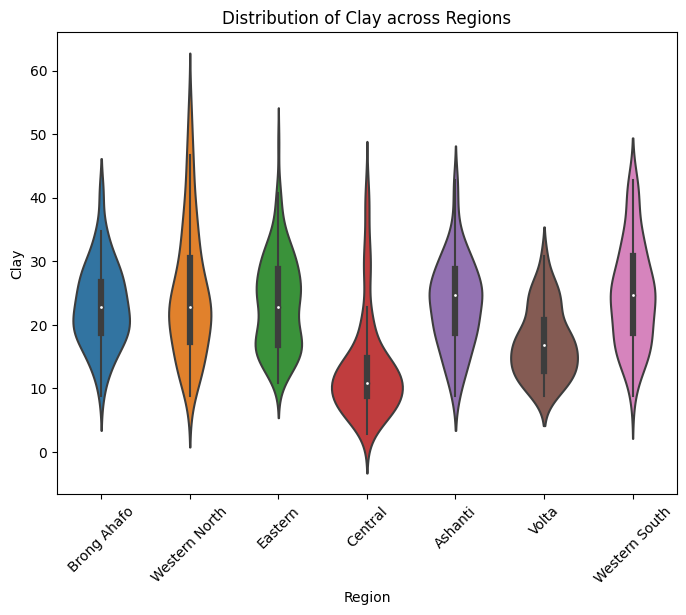

In [87]:
# How does the soil distribution vary across regions in Ghana?

# Except for Brong Ahafo, all other regions in Ghana show a broader range of pH values, indicating a higher level of variability in pH across those regions.
# Out of all the regions in Ghana, the Eastern and Central regions exhibit a narrow range of SOC, indicating a lower variability in SOC across these regions.
# Except for Brong Ahafo, other regions have a broder distribution of Fe(iron) data, indicating a large spread or variability in the SOC data within these regions.
# Except for Brong Ahafo and Western North, other regions have a broader distribution of Al (aluminium) data, suggesting a larger spread or variability in aluminium concentrations.
# Except for Brong Ahafo and Western North, other regions exhibit a wider range of data distribution for various soil properties , indicating a large variability across these regions.

# Select the relevant columns for soil properties and region

soil_properties_region = soil_survey[['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay', 'Region']]

# Create individual violin plots for each soil property
for property_name in ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Region', y=property_name, data=soil_properties_region)
    plt.title(f'Distribution of {property_name} across Regions')
    plt.xlabel('Region')
    plt.ylabel(property_name)
    plt.xticks(rotation=45)  # Rotate the x-labels for better readability
    plt.show()
  

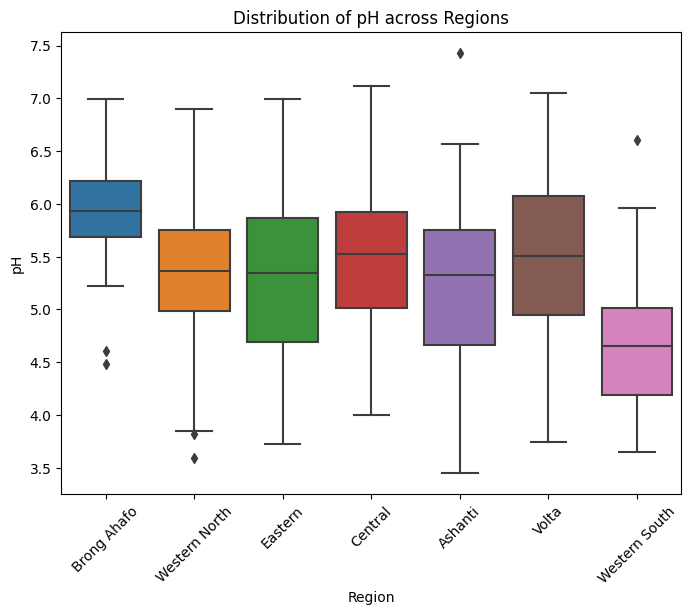

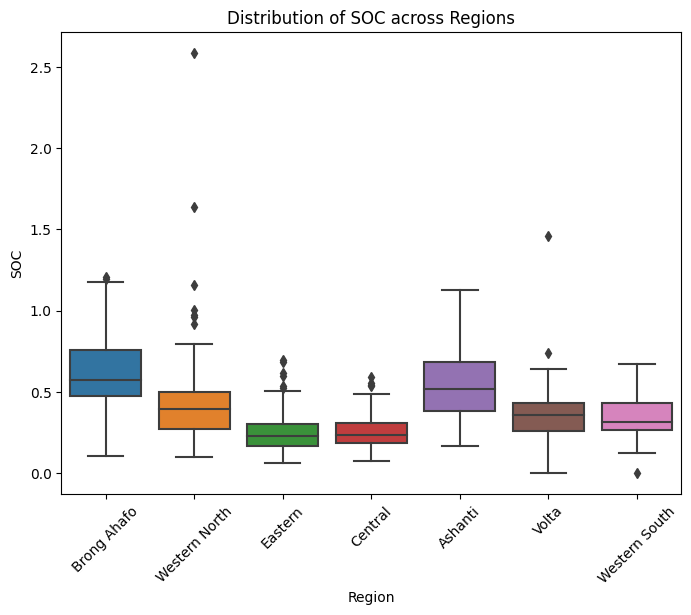

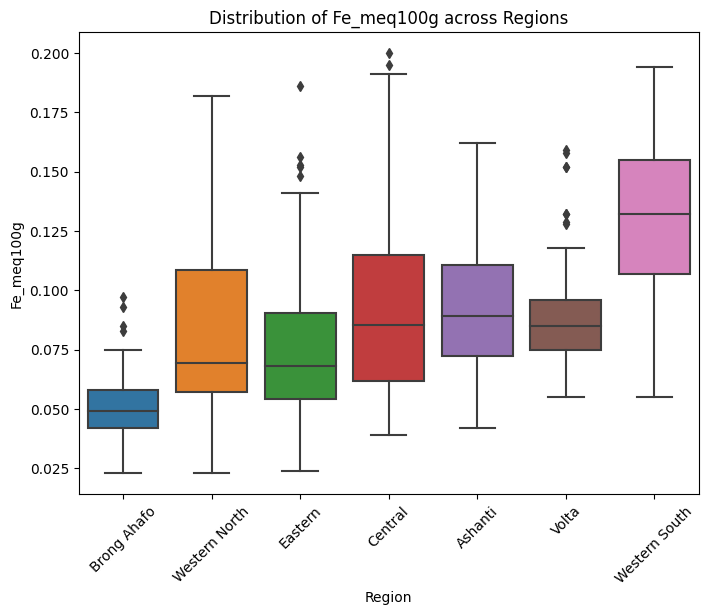

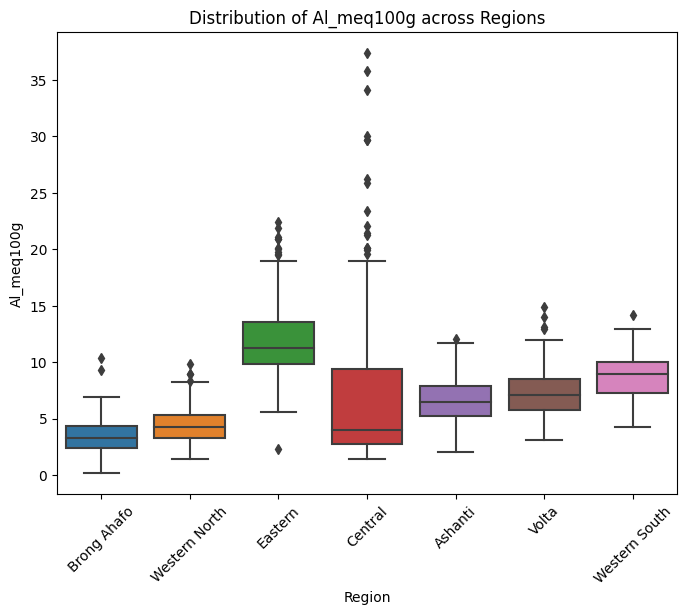

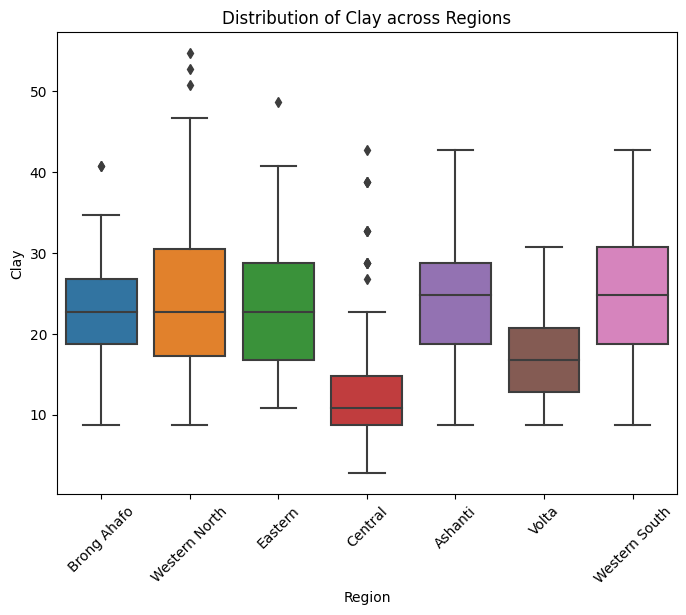

In [88]:
# Among all the regions, Bong Ahafo has the highest median pH value.
# Ashanti and Brong Ahafo regions have the highest soil organic carbon (SOC) values compared to other regions.
# The Western South region exhibits the highest iron concentrations among all the regions.
# The region with the highest median  aluminum content is Eastern region.
# Ashanti and Western South regions have the highest median clay values among all the regions.

# Select the relevant columns for soil properties and region
soil_properties = soil_survey[['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay', 'Region']]

# Create individual boxplots for each soil property
for property_name in ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Region', y=property_name, data=soil_properties)
    plt.title(f'Distribution of {property_name} across Regions')
    plt.xlabel('Region')
    plt.ylabel(property_name)
    plt.xticks(rotation=45)
    plt.show()



In [19]:
#
soil_survey['DistName'].value_counts()

Hohoe             35
Asikuma           28
Papase            25
Mampong           23
Nyakrom           22
Oyoko             18
Tafo              18
Fosu              18
Jasikan           17
Samreboi          17
Suhum             16
Twifo Praso       16
Juaso             16
Bawdua            15
Nkwakwa           15
Oda               15
Asamankese        15
Osino             15
Jukwa             14
Akontombra        13
Kade              13
Dadiesoba         13
Essam             13
Sankore           12
Wassa Akr.        12
Antoakrom         12
Bodi              11
Sunyani           11
Obuasi            11
Tepa              11
Dunkwa            11
Juaboso           10
Enchi             10
Kajebril          10
Goaso             10
Offinso           10
Huni Valley       10
Diaso             10
Bechem            10
Adaborkrom         9
New Edubease       9
Dormaa Ahenkro     9
Bekwai             9
Nkawie             9
Nkrankwanta        9
Dadieso            8
Adjuafoah          8
Fumso        

In [20]:
districts = soil_survey['District'].value_counts()
print(districts)

Hohoe           35
Papase          25
Mampong         23
Nyarkrom        23
Oyoko           18
                ..
New Abirem       7
Daboase          6
Mankranso        5
Sefwi Bekwai     4
Boako            4
Name: District, Length: 61, dtype: int64


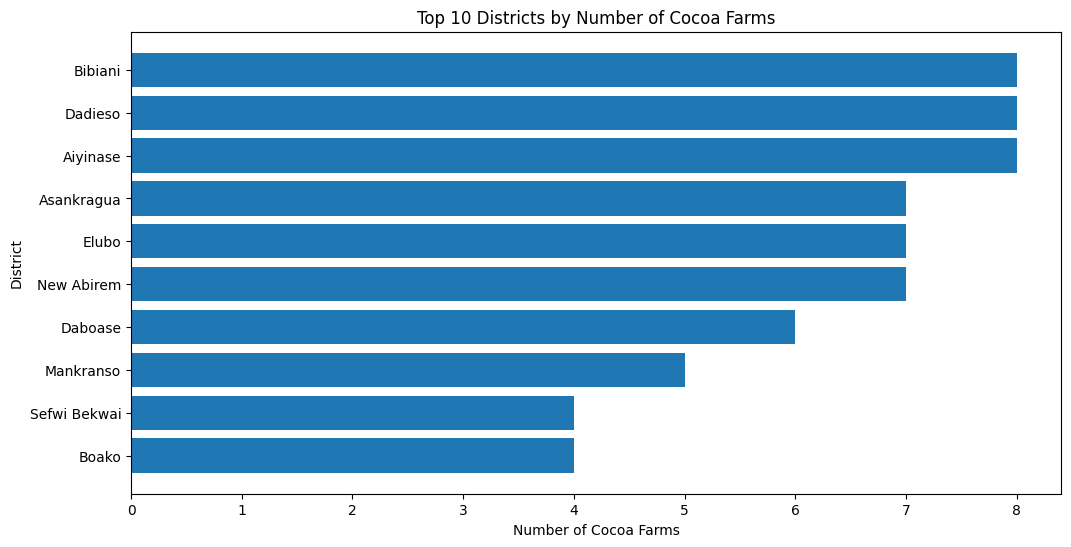

In [22]:
# Which districts has the most cocoa farms?
criteria = 'ObsFarm#'

# Calculate the criteria for each district
district_counts = soil_survey['District'].value_counts()

# Sort the districts based on the criterion
sorted_districts = district_counts.sort_values(ascending=True)

# Select the Top N Districts
top_n = 10 # Choose the desire value for N
top_districts = sorted_districts[:top_n]

# Plot the data for the selected districts
plt.figure(figsize=(12,6))
plt.barh(top_districts.index, top_districts.values)
plt.xlabel('Number of Cocoa Farms')
plt.ylabel('District')
plt.title(f'Top {top_n} Districts by Number of Cocoa Farms')
plt.show()

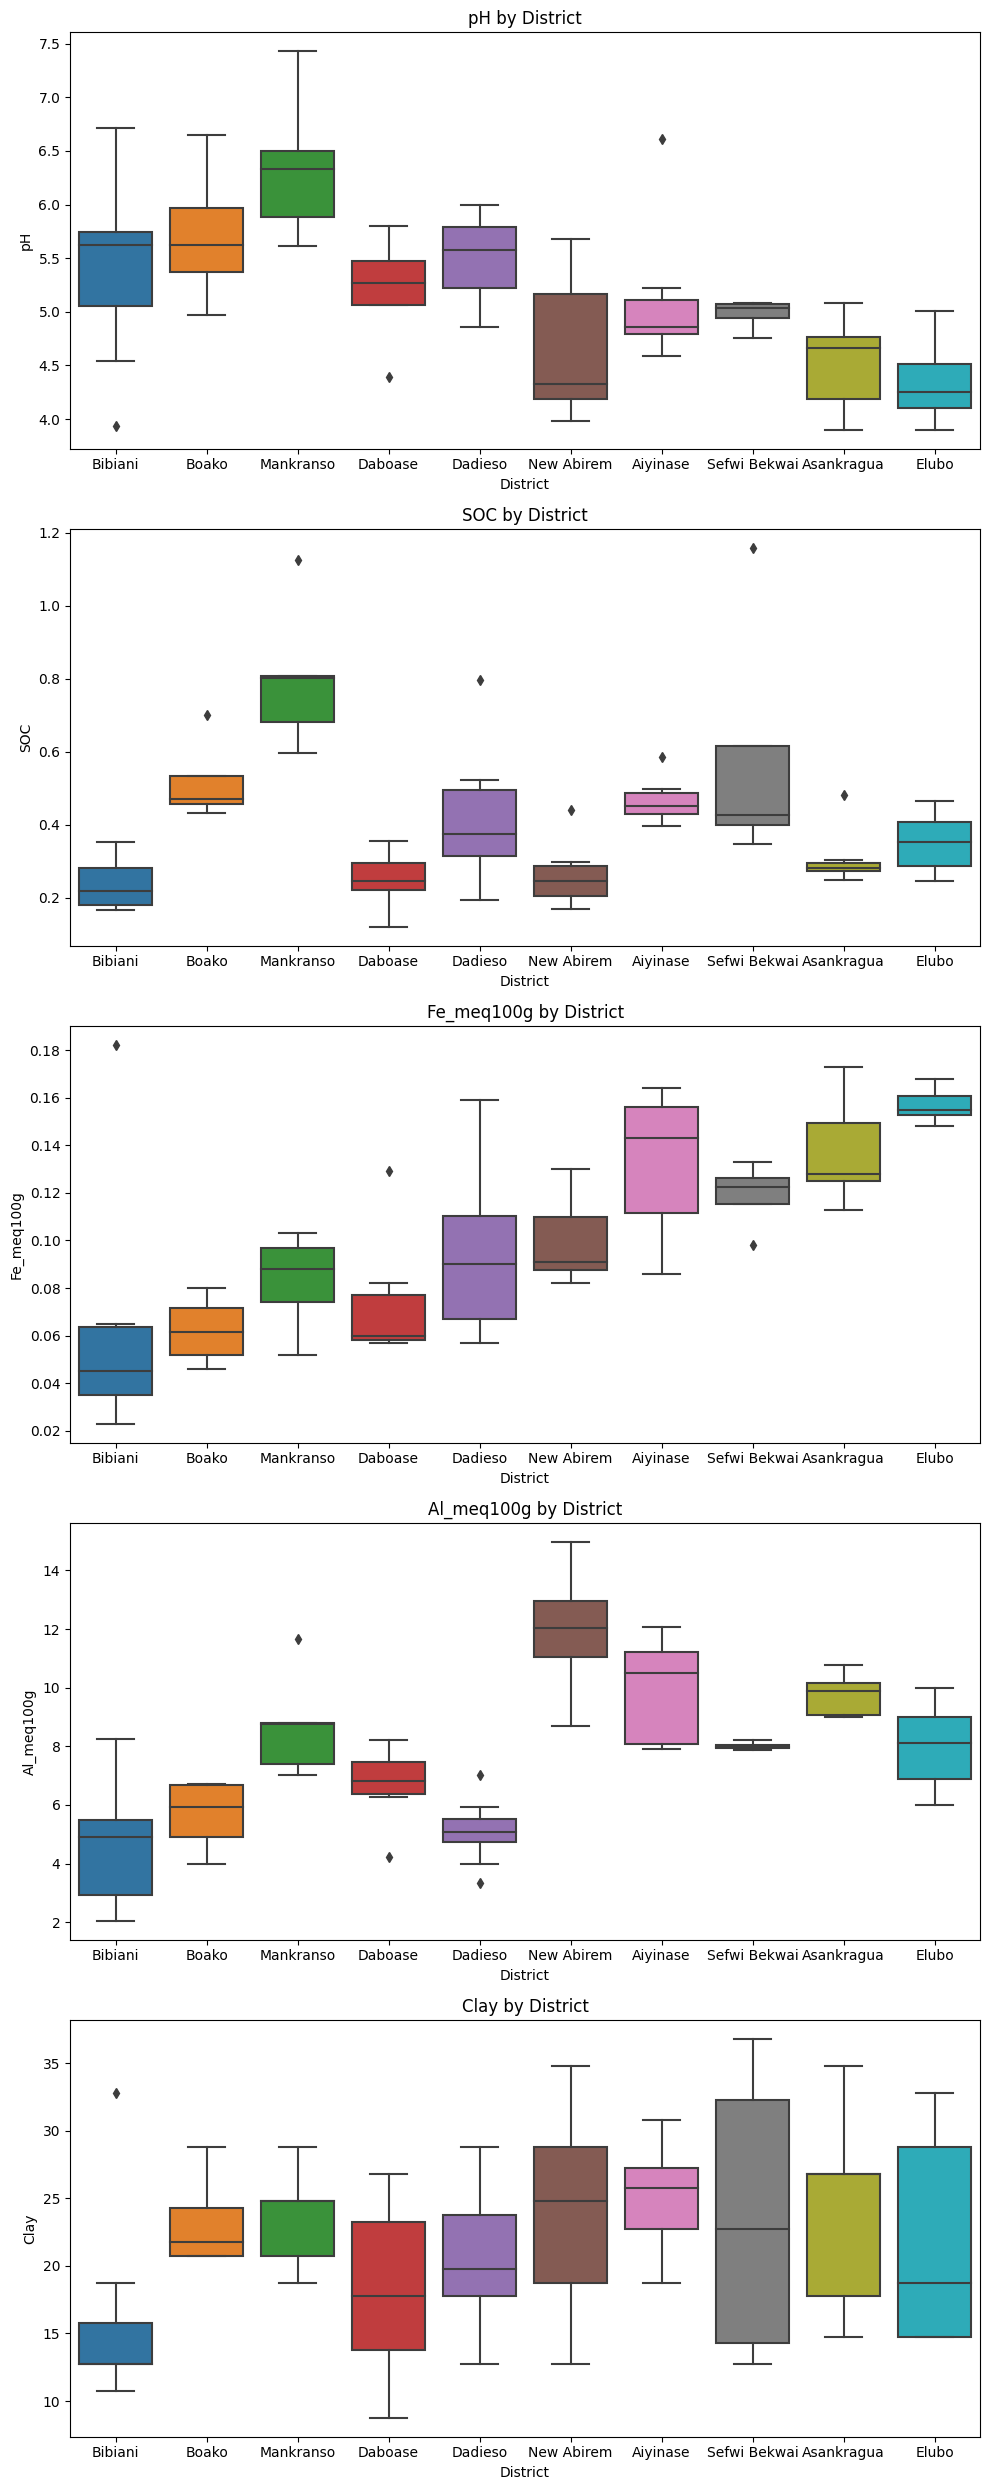

In [90]:
# How does the soil properties vary across the top 10 district?
# District with the highest median pH and SOC concentration: Mankranso
# District with the highest median concentration of iron: Elubo
# District with the highest median concentration of aluminum: Aiyinase
# District with the highest median clay content: Elubo

# Select the soil properties and districts of interest
soil_properties = ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']
districts_of_interest = top_10_districts.index.tolist()

# Filter the data for the selected districts
filtered_data = soil_survey[soil_survey['District'].isin(districts_of_interest)]

# Create subplots for each soil property
fig, axes = plt.subplots(nrows=len(soil_properties), ncols=1, figsize=(10, len(soil_properties)*5))

# Iterate over each soil property
for i, property_name in enumerate(soil_properties):
    # Plot the data for each district
    sns.boxplot(x='District', y=property_name, data=filtered_data, ax=axes[i])
    axes[i].set_xlabel('District')
    axes[i].set_ylabel(property_name)
    axes[i].set_title(f'{property_name} by District')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\chimi\AppData\Local\Temp\ipykernel_20352\2256146265.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = soil_survey.groupby('Ecology').mean().reset_index()


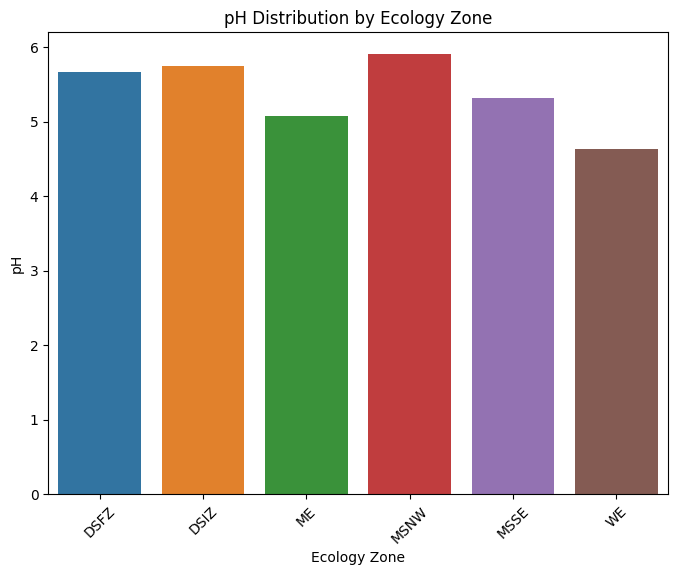

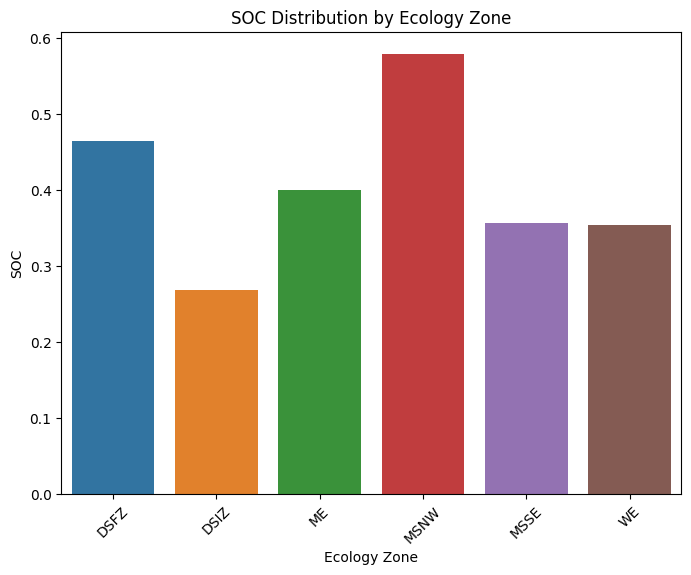

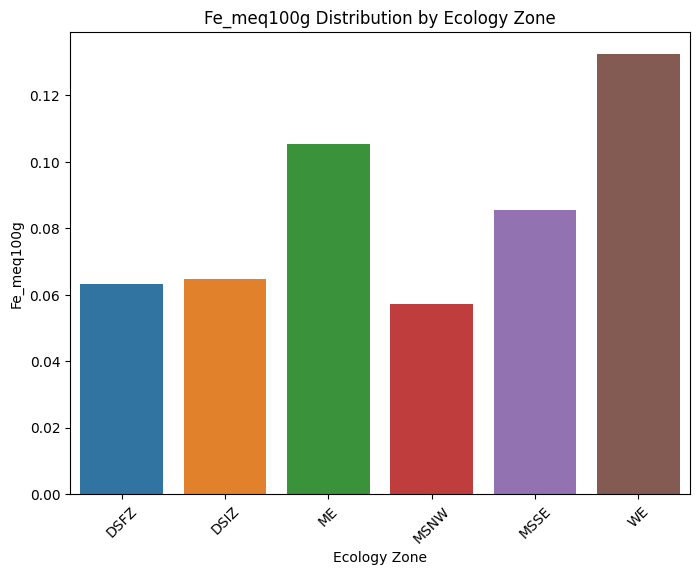

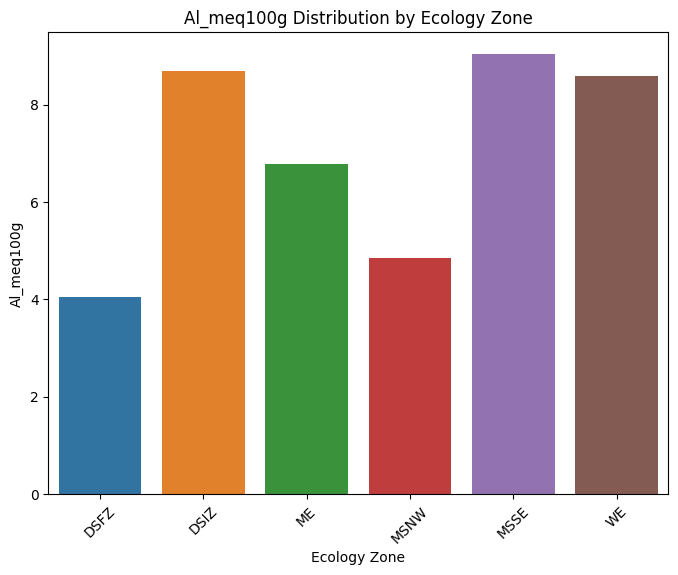

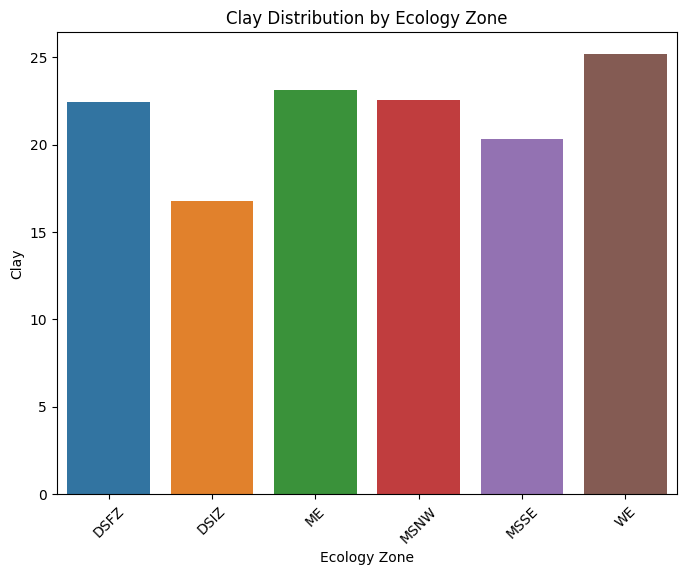

In [85]:
# What is the distribution of soil across different ecological zones?
# The MSNW ecological zone has the highest concentration of SOC (Soil Organic Carbon) compared to other ecological zones. 
# On the other hand, the WE (West Equatorial) ecological zone contains the highest concentration of iron (Fe_meq100g) among all the ecological zones.

# Select relevant columns
data = soil_survey.groupby('Ecology').mean().reset_index()

# Plot bar plots for average values
for property_name in ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Ecology', y=property_name, data=data)
    plt.title(f'{property_name} Distribution by Ecology Zone')
    plt.xlabel('Ecology Zone')
    plt.ylabel(property_name)
    plt.xticks(rotation=45)
    plt.show()

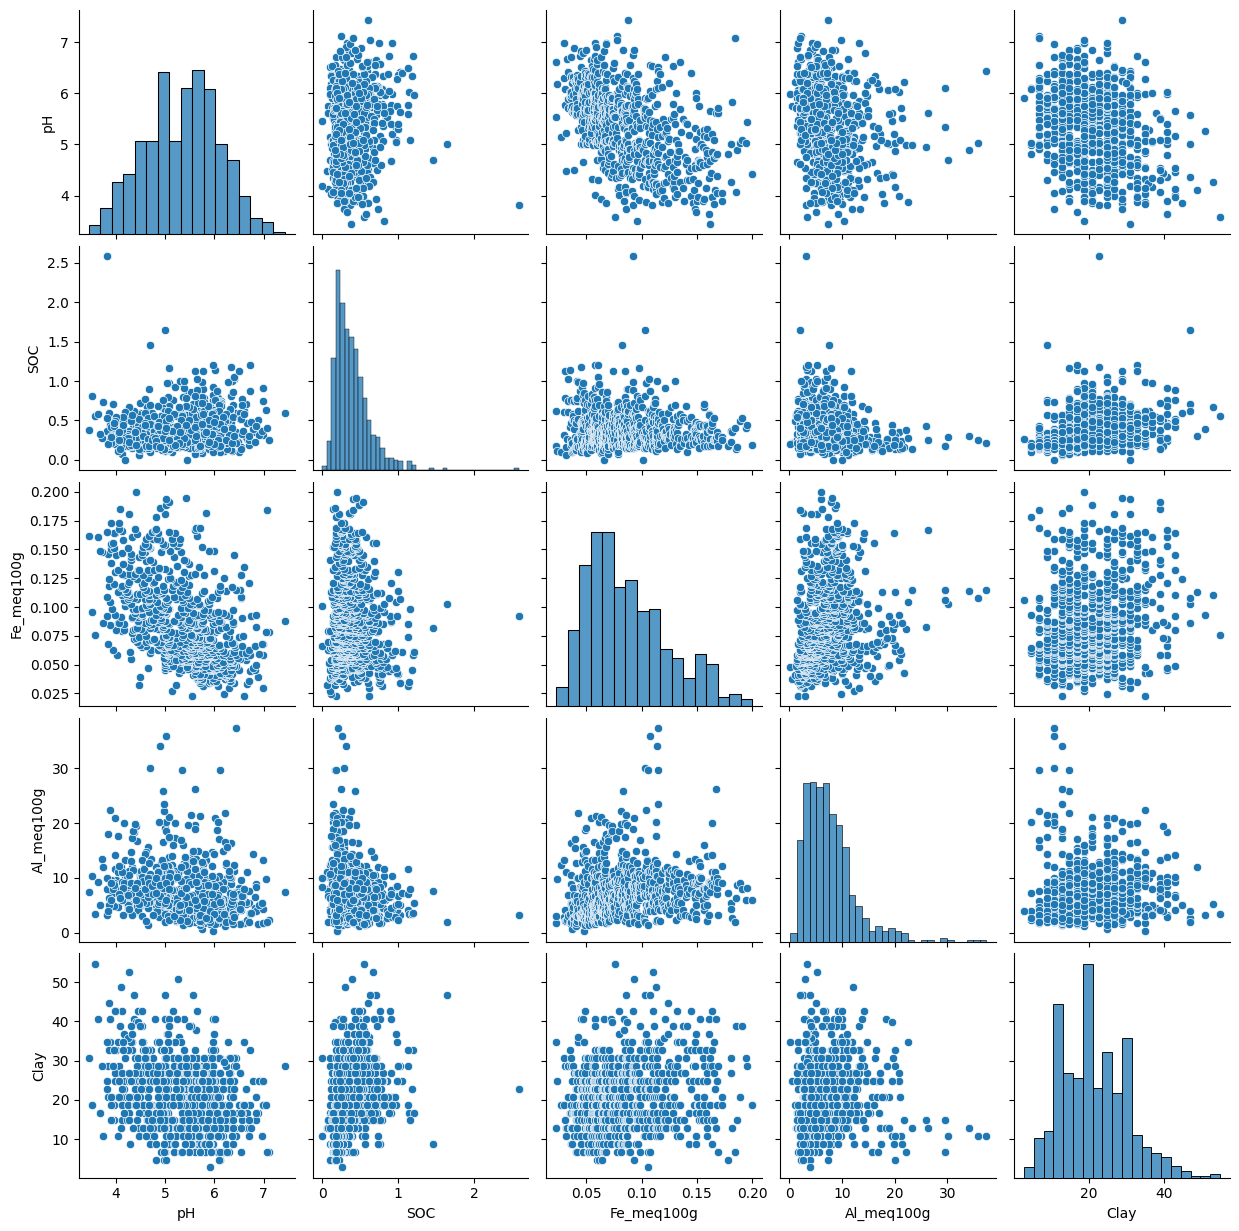

In [64]:
# What is the relationship between different soil properties?

# Select the soil properties for the scatterplot
soil_properties = ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']

# Create a DataFrame with the selected soil properties
soil_data = soil_survey[soil_properties]

# Create a scatterplot matrix
sns.pairplot(soil_data)
plt.show()

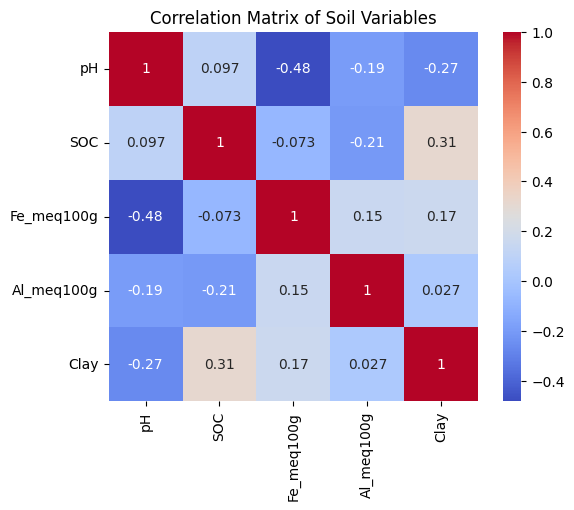

In [65]:
# What is the correleation between soil properties?
# There is a moderate correleation between SOC and Clay.


# Select the soil properties for the correlation matrix
soil_properties = ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']

# Create a DataFrame with the selected soil properties
soil_data = soil_survey[soil_properties]

# Compute the correlation matrix
correlation_matrix = soil_data.corr()

# Create a correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Matrix of Soil Variables')

# Show the plot
plt.show()
